# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


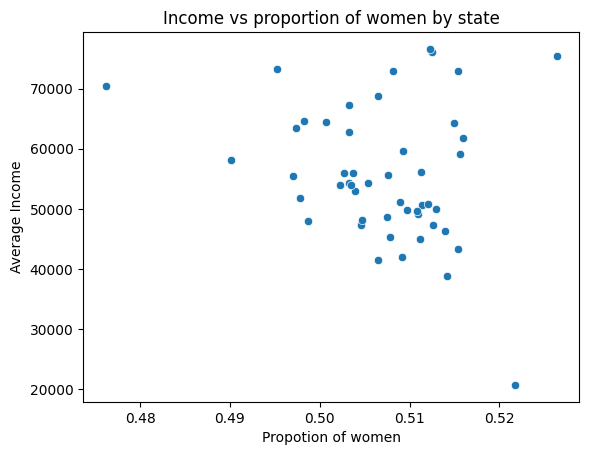

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

# reading multiples csv files and stacking them into one big DF
files = glob.glob('states*.csv')
df_list = []
for file in files:
    data = pd.read_csv(file)
    df_list.append(data)

df = pd.concat(df_list, ignore_index=True)

#print(df.dtypes)

# Removing Dollar sign at the beginning of 'Income' and turning col into Float
df['Income'] = df['Income'].replace('[$,]', '', regex=True).astype(float)

# Separating col GenderPop into 2 cols and eliminating last chr for each new value
df[['Male', 'Female']] = df['GenderPop'].str.split('_', expand=True).apply(lambda value_in_col: value_in_col.str[:-1]).replace('', pd.NA).astype('Int64')

# Eliminating GendePop Colum
df = df[['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'Male', 'Female']]

# Eliminating "%" at the end of each value from every col
cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
df[cols] = df[cols].replace('%', '', regex=True).astype(float)


# Checking for duplicates in df
#df[df.duplicated()] # Seeing duplicates in df
#df[df.duplicated(subset=['State', 'TotalPop'])] # seeing duplicates in subset

# Dropping duplicates in a subset
#df = df.drop_duplicates(subset=['column1_', 'column_2'])
#df.duplicated().sum() # Counting duplicates
df = df.drop_duplicates().reset_index(drop=True) # dropping duplicates
 
df.head(100)
#print(df.columns)


# Answering question
df['prop_female'] = df['Female'] / df['TotalPop']
df['prop_female'] = df['prop_female'].astype(float)
sns.scatterplot(data=df, x='prop_female', y='Income')
plt.xlabel('Propotion of women')
plt.ylabel('Average Income')
plt.title('Income vs proportion of women by state')
plt.show()


#df[df['Income'] > 70000][['Female', 'State', 'Income']] # Filtering states where income is higher than x and showing other columns


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [ ]:
print(df.columns)
print(df.info())

# Answer : Histograms only make sense for numeric data like "int" and "float"

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Male', 'Female', 'prop_female'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        51 non-null     object 
 1   TotalPop     51 non-null     int64  
 2   Hispanic     51 non-null     float64
 3   White        51 non-null     float64
 4   Black        51 non-null     float64
 5   Native       51 non-null     float64
 6   Asian        51 non-null     float64
 7   Pacific      47 non-null     float64
 8   Income       51 non-null     float64
 9   Male         51 non-null     Int64  
 10  Female       49 non-null     Int64  
 11  prop_female  49 non-null     float64
dtypes: Int64(2), float64(8), int64(1), object(1)
memory usage: 5.0+ KB
None


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [88]:
df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female,prop_female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527,0.515364
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215,0.476175
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840,0.503294
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295,0.509192
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329,0.503217


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

In [ ]:
# Answering question
df['prop_female'] = df['Female'] / df['TotalPop']
df['prop_female'] = df['prop_female'].astype(float)
sns.scatterplot(data=df, x='prop_female', y='Income')
plt.xlabel('Propotion of women')
plt.ylabel('Average Income')
plt.title('Income vs proportion of women by state')
plt.show()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [90]:
print(df.Female)

0      2489527
1       349215
2      3342840
3      1506295
4     19334329
5      2630239
6      1841615
7       478041
8       340810
9     10045763
10     5123362
11      696428
12      806083
13     6556862
14     3333382
15     1558931
16     1453125
17     2233145
18     2364097
19      679019
20        <NA>
21     3455936
22     5038598
23     2727005
24     1536358
25     3081445
26        <NA>
27      939759
28     1390901
29      670717
30     4561386
31     1051703
32    10131373
33     5049925
34      353677
35     5913084
36     1942789
37     1990780
38     6534215
39     1869213
40      543273
41     2455167
42      419713
43     3331859
44    13367298
45     1444150
46      318031
47     4195682
48     3497739
49      937789
50     2890732
Name: Female, dtype: Int64


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

11. Drop those duplicates using the `.drop_duplicates()` function.

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

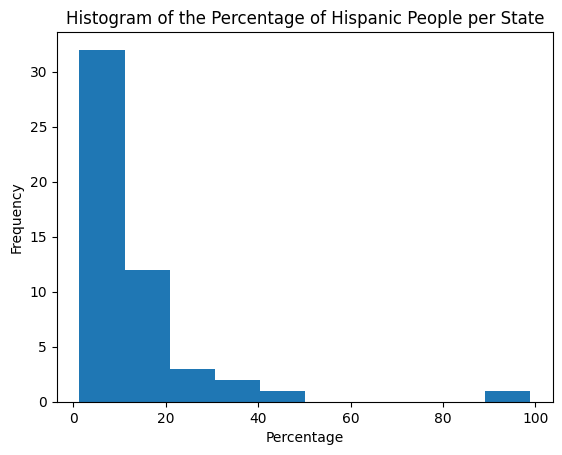

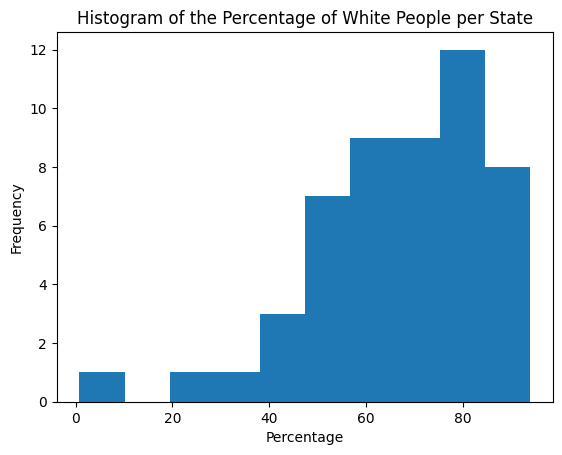

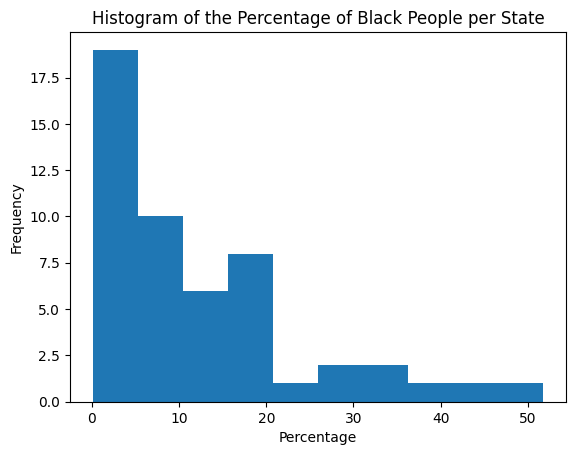

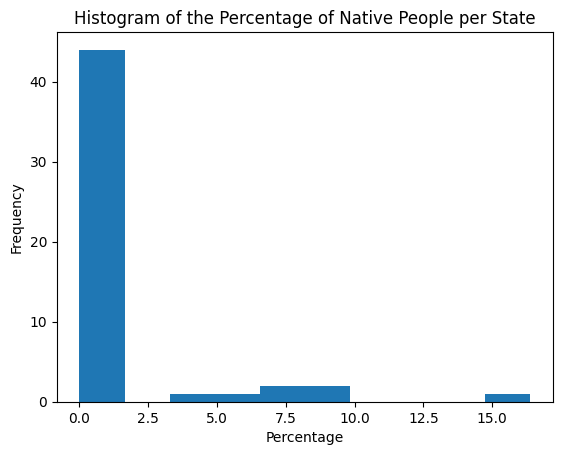

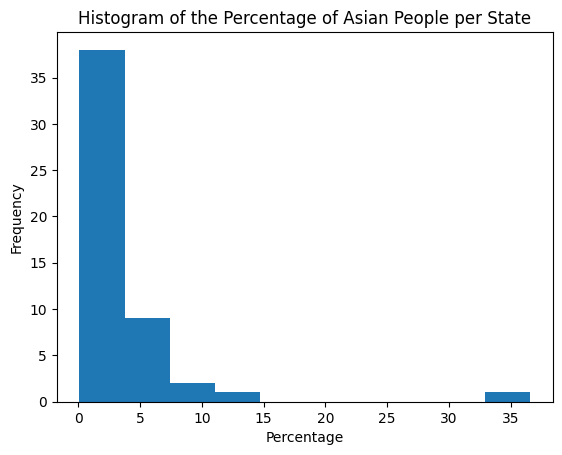

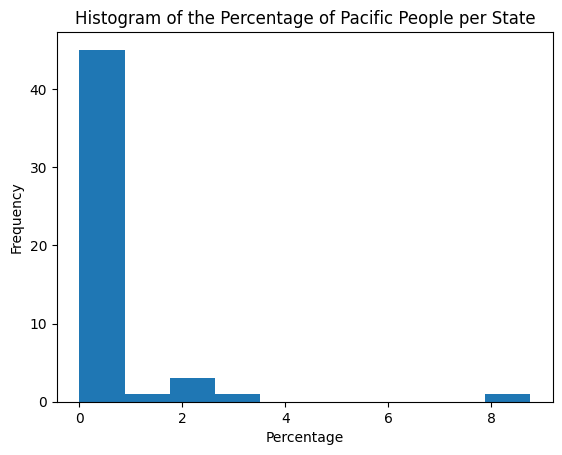

<Figure size 640x480 with 0 Axes>

In [109]:
df.loc[:, df.isna().any()] # shows the col with missing values
#df.isna().sum() # sums missing values per col

# Replacing NaN values with the remainder percentage in race for each row
df[cols] = df[cols].apply(lambda row: row.fillna(100 - row.sum()), axis=1)

# Creating a histogram for each race
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(df[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.